In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import IPython.display as ipd

from local_signal import *
from general import *


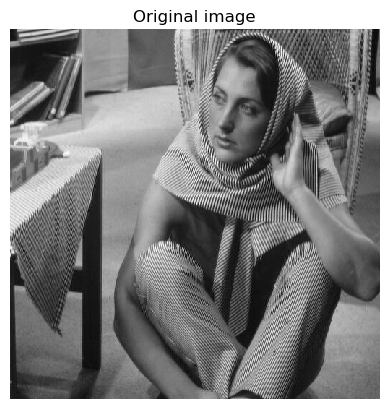

In [7]:
n = 256
image = load_image('barbara.jpg')

imageplot(image, "Original image")

In [76]:
def get_variance(snr, image, noise):
    """
    Function that computes the required variance of the noise to achieve a given SNR.
    """
    #get the norm of the image and the noise
    norm = np.linalg.norm(image)**2
    noise_norm = np.linalg.norm(noise)**2
    #compute the variance
    # variance = norm/(noise_norm*(np.exp((snr/10))))
    variance = norm/(noise_norm*(10**(snr/10)))
    return variance

def generate_noisy_image(snr, image):
    """ 
    Function that generates a noisy image with a given SNR.
    """
    noise = np.random.normal(0, 1, image.shape)
    variance = get_variance(snr, image, noise)
    sigma = np.sqrt(variance)
    noisy_image = image + noise * sigma
    return variance, noisy_image

def compute_snr(image, noisy_image):
    """
    Function that computes the SNR between an image and a noisy image.
    """
    #get the norm of the image and the noise
    norm = np.linalg.norm(image)**2
    noise_norm = np.linalg.norm(noisy_image - image)**2
    #compute the SNR
    snr = 10*np.log10(norm/noise_norm)
    return snr

0.009641573046598078


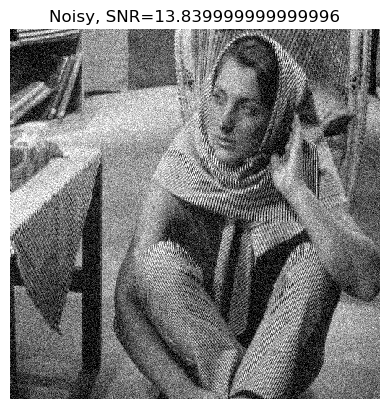

In [77]:
target_SNR = 13.84
noise_sigma, noisy_image = generate_noisy_image(target_SNR, image)
print(noise_sigma)
imageplot(clamp(noisy_image), "Noisy, SNR=" + str(compute_snr(image, noisy_image)))

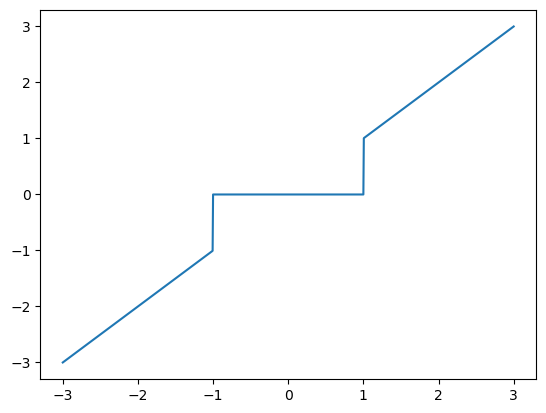

In [63]:
def thresh_hard(u,t):return u*(abs(u)>t)
alpha = np.linspace(-3,3,1000)
plt.plot(alpha, thresh_hard(alpha,1))
plt.show()

In [64]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/np.linalg.norm(h)
Jmin = 2

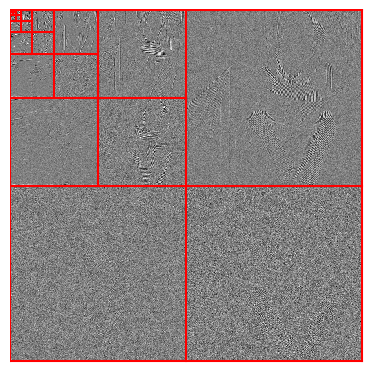

In [65]:
a = perform_wavortho_transf(noisy_image,Jmin,+1,h)
plot_wavelet(a,Jmin);

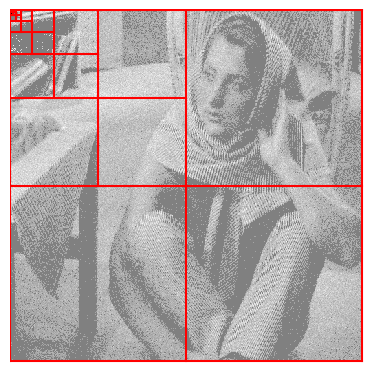

In [66]:
T = 3*noise_sigma
aT = thresh_hard(noisy_image,T)
plot_wavelet(aT,Jmin);


In [67]:
fHard = perform_wavortho_transf(aT,Jmin,-1,h)


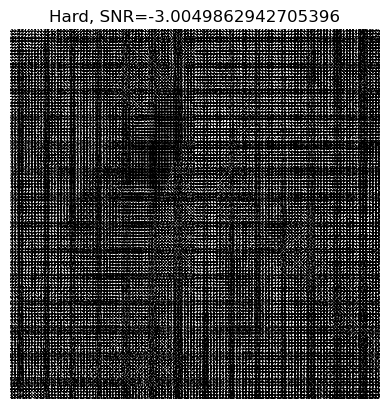

In [68]:
imageplot(clamp(fHard), 'Hard, SNR=' + str(snr(image,fHard)) )

In [69]:
image

array([[0.0840708 , 0.09292035, 0.09292035, ..., 0.07522124, 0.21238938,
        0.40707965],
       [0.0840708 , 0.08849558, 0.08849558, ..., 0.0840708 , 0.22123894,
        0.4159292 ],
       [0.07522124, 0.0840708 , 0.0840708 , ..., 0.09734513, 0.23451327,
        0.42920354],
       ...,
       [0.13274336, 0.13274336, 0.12389381, ..., 0.40265487, 0.40265487,
        0.40265487],
       [0.13274336, 0.13274336, 0.12831858, ..., 0.42477876, 0.4159292 ,
        0.40707965],
       [0.13274336, 0.13274336, 0.12831858, ..., 0.44690265, 0.42920354,
        0.40707965]])